### Imports

In [1]:
# !pip install matplotlib==3.5.0 

In [2]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import time
from typing import List
import random as rnd
import matplotlib
import json
import re
# from mpl_toolkits.mplot3d import Axes3D
# from scipy import interpolate

### Global Constants

In [3]:
agent_num = 1000
search_iteration = 250
landscape_repetitions = 100

### Data Ingestion

In [4]:
results__fr_nfr_separate = {}
results__fr_nfr_together = {}

results__nfr_fr_separate = {}
results__nfr_fr_together = {}

results__nfr_nfr_separate = {}
results__nfr_nfr_together = {}

fr__N12_separate = {}
fr__N12_together = {}
fr__N6_separate = {}
fr__N6_together = {}


## When running locally or elsewhere, replace the file path(s) with the correct path(s)
with open('/content/interdepency__fr_nfr__separate__results.json') as json_file:
    results__fr_nfr_separate = json.load(json_file)
with open('/content/interdepency__fr_nfr__together__results.json') as json_file:
    results__fr_nfr_together = json.load(json_file)

with open('/content/interdepency__nfr_fr__separate__results.json') as json_file:
    results__nfr_fr_separate = json.load(json_file)
with open('/content/interdepency__nfr_fr__together__results.json') as json_file:
    results__nfr_fr_together = json.load(json_file)

with open('/content/interdepency__nfr_nfr__separate__results.json') as json_file:
    results__nfr_nfr_separate = json.load(json_file)
with open('/content/interdepency__nfr_nfr__together__results.json') as json_file:
    results__nfr_nfr_together = json.load(json_file)

with open('/content/project_SizeComplex__N12__separate__results.json') as json_file:
    fr__N12_separate = json.load(json_file)
with open('/content/project_SizeComplex__N12__together__results.json') as json_file:
    fr__N12_together = json.load(json_file)
with open('/content/project_SizeComplex__N6__separate__results.json') as json_file:
    fr__N6_separate = json.load(json_file)
with open('/content/project_SizeComplex__N6__together__results.json') as json_file:
    fr__N6_together = json.load(json_file)

### FR-NFR Interdependency

[0.012318973162924296, 0.008813537263835158, -0.0018677412880147015]


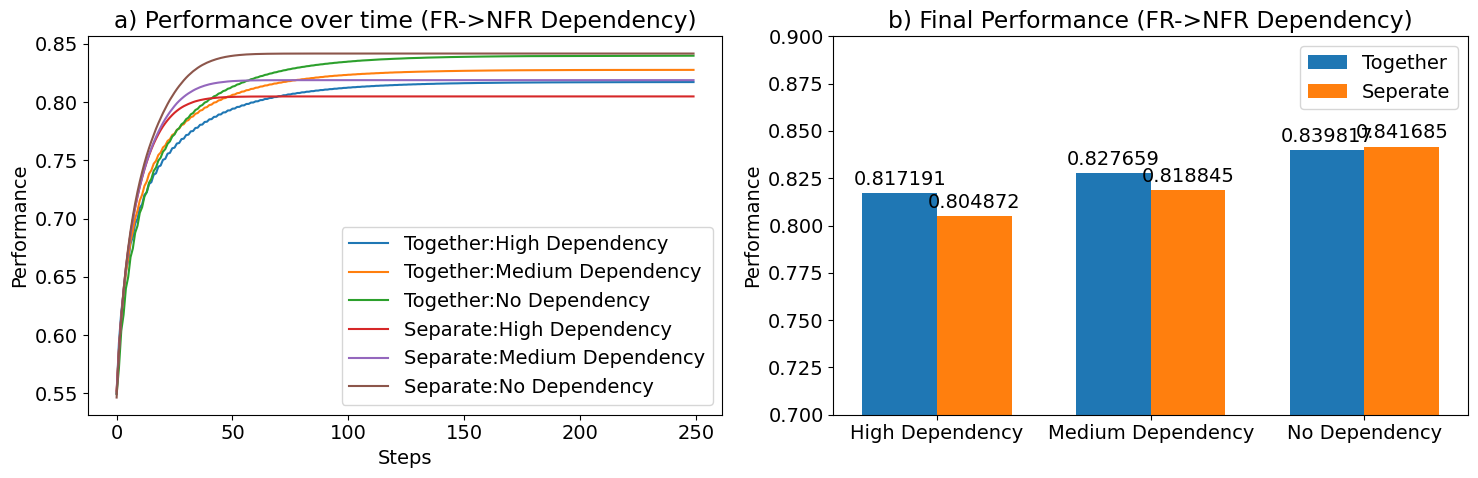

In [5]:
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in results__fr_nfr_together.items():
    ax1.plot(x, results__fr_nfr_together[name], label=f"Together:{name}")
for name, vals in results__fr_nfr_separate.items():
    ax1.plot(x, results__fr_nfr_separate[name], label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("a) Performance over time (FR->NFR Dependency)")
#plt.show()


labels = ["High Dependency", "Medium Dependency", "No Dependency"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in results__fr_nfr_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in results__fr_nfr_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('b) Final Performance (FR->NFR Dependency)')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.7, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

[0.012318973162924296, 0.008813537263835158]


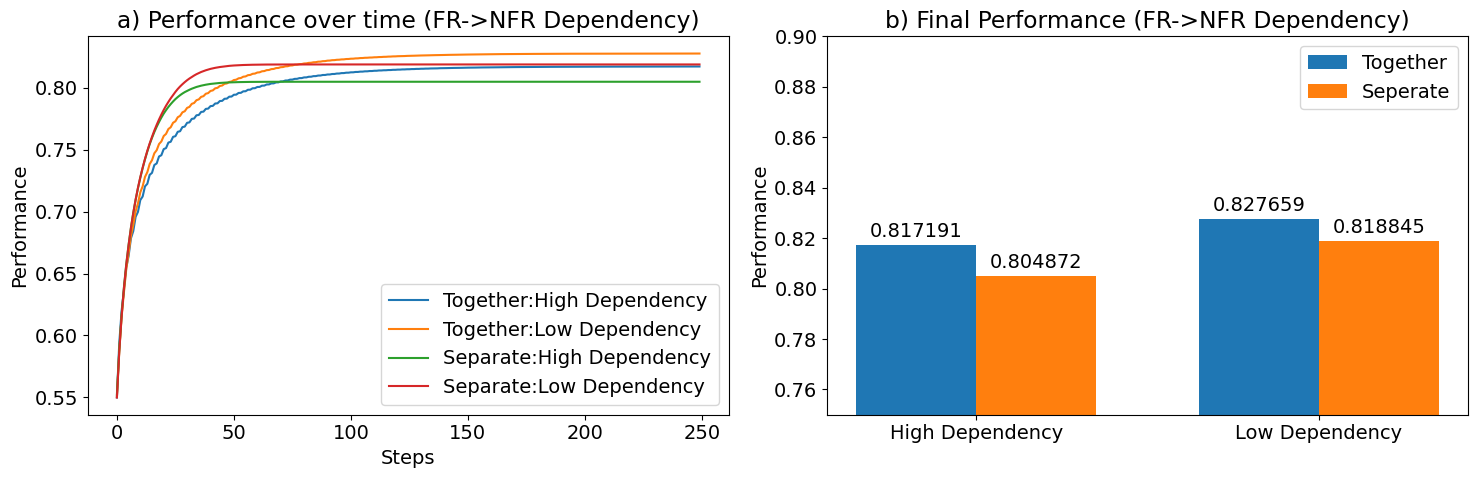

In [6]:
## Remove no dependency because it does not make sense
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

results__fr_nfr_together_2 = results__fr_nfr_together.copy()
results__fr_nfr_together_2.pop("No Dependency")
results__fr_nfr_together_2["Low Dependency"] = results__fr_nfr_together_2.pop("Medium Dependency")
results__fr_nfr_separate_2 = results__fr_nfr_separate.copy()
results__fr_nfr_separate_2.pop("No Dependency")
results__fr_nfr_separate_2["Low Dependency"] = results__fr_nfr_separate_2.pop("Medium Dependency")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in results__fr_nfr_together_2.items():
    ax1.plot(x, vals, label=f"Together:{name}")
for name, vals in results__fr_nfr_separate_2.items():
    ax1.plot(x, vals, label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("a) Performance over time (FR->NFR Dependency)")
#plt.show()


labels = ["High Dependency", "Low Dependency"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in results__fr_nfr_together_2.items():
    max_perfomance_together.append(vals[-1])
for name, vals in results__fr_nfr_separate_2.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('b) Final Performance (FR->NFR Dependency)')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.75, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

[0.01102720239484456, 0.008813537263835158, 0.03361196539646305]


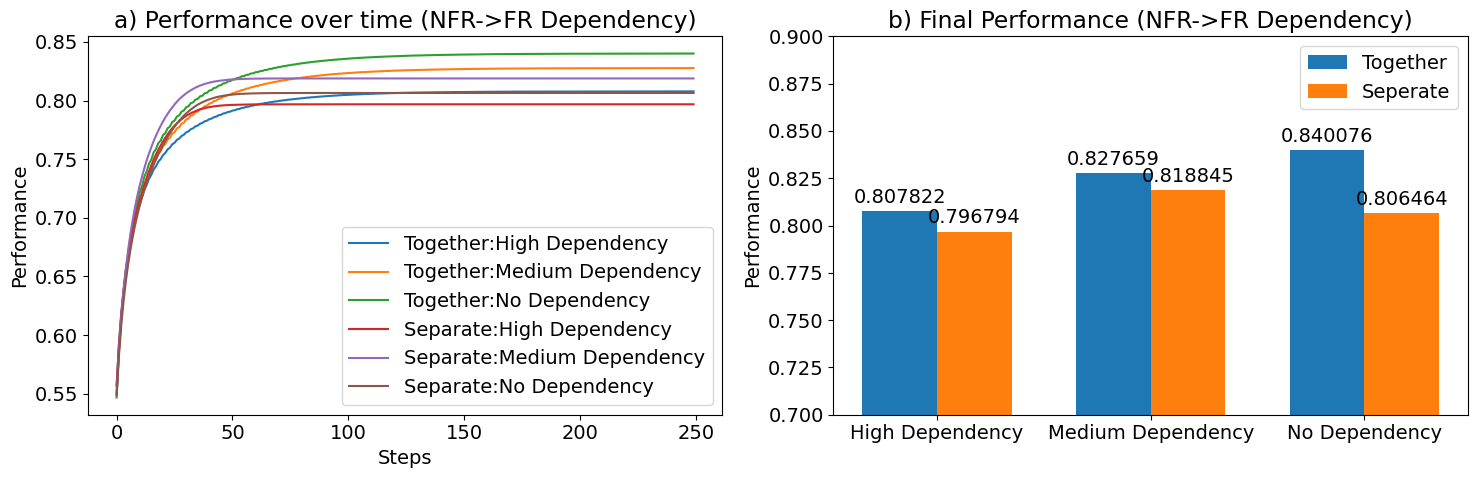

In [7]:
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in results__nfr_fr_together.items():
    ax1.plot(x, results__nfr_fr_together[name], label=f"Together:{name}")
for name, vals in results__nfr_fr_separate.items():
    ax1.plot(x, results__nfr_fr_separate[name], label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("a) Performance over time (NFR->FR Dependency)")
#plt.show()


labels = ["High Dependency", "Medium Dependency", "No Dependency"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in results__nfr_fr_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in results__nfr_fr_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('b) Final Performance (NFR->FR Dependency)')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.7, 0.9])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

[0.01102720239484456, 0.008813537263835158]


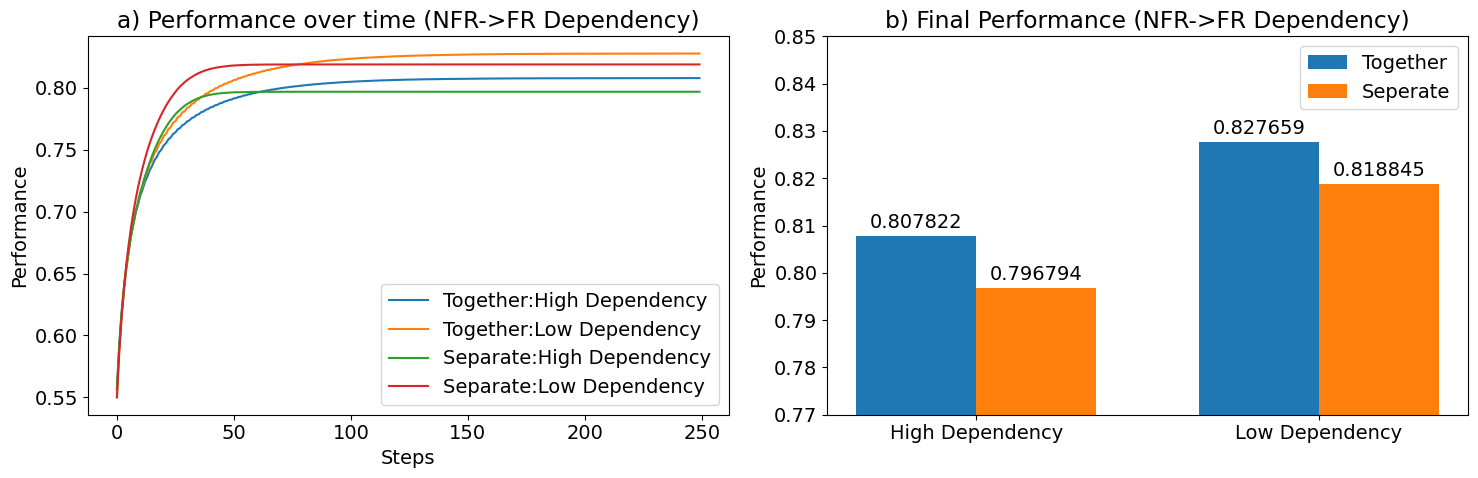

In [8]:
## Remove no dependency because it does not make sense
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

results__nfr_fr_together_2 = results__nfr_fr_together.copy()
results__nfr_fr_together_2.pop("No Dependency")
results__nfr_fr_together_2["Low Dependency"] = results__nfr_fr_together_2.pop("Medium Dependency")
results__nfr_fr_separate_2 = results__nfr_fr_separate.copy()
results__nfr_fr_separate_2.pop("No Dependency")
results__nfr_fr_separate_2["Low Dependency"] = results__nfr_fr_separate_2.pop("Medium Dependency")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in results__nfr_fr_together_2.items():
    ax1.plot(x, vals, label=f"Together:{name}")
for name, vals in results__nfr_fr_separate_2.items():
    ax1.plot(x, vals, label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("a) Performance over time (NFR->FR Dependency)")
#plt.show()


labels = ["High Dependency", "Low Dependency"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in results__nfr_fr_together_2.items():
    max_perfomance_together.append(vals[-1])
for name, vals in results__nfr_fr_separate_2.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('b) Final Performance (NFR->FR Dependency)')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.77, 0.85])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

### NFR Interdependency

[0.014264030209883649, 0.008813537263835158, 0.013721900159256117]


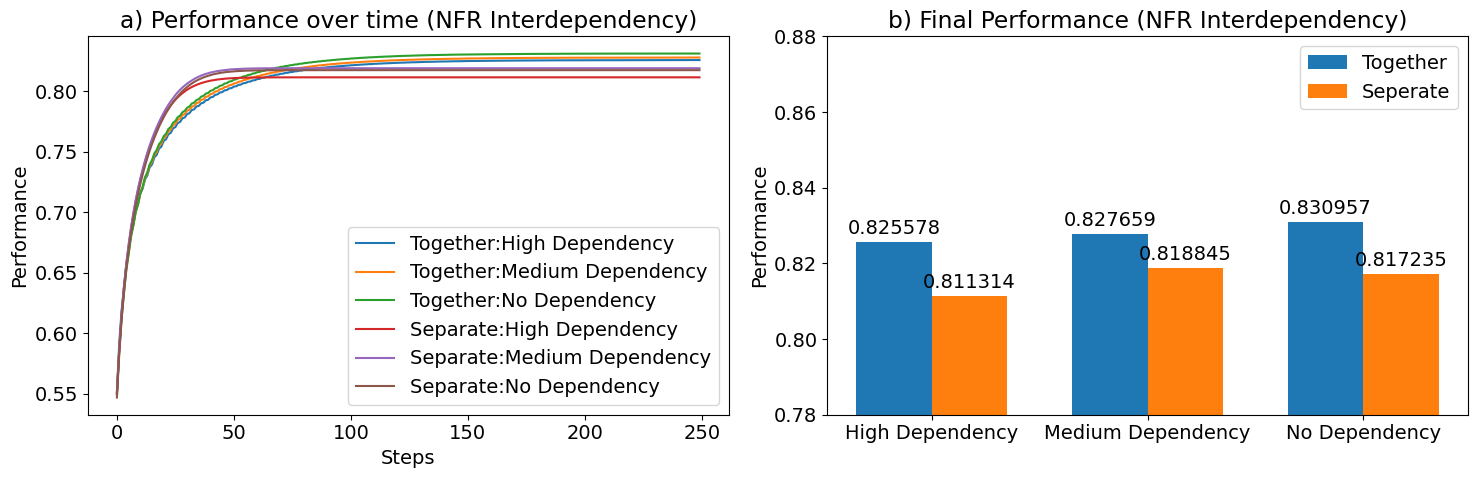

In [9]:
x = range(search_iteration)

font = {'size': 14}
matplotlib.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for name, vals in results__nfr_nfr_together.items():
    ax1.plot(x, results__nfr_nfr_together[name], label=f"Together:{name}")
for name, vals in results__nfr_nfr_separate.items():
    ax1.plot(x, results__nfr_nfr_separate[name], label=f"Separate:{name}")
ax1.legend()
ax1.set_ylabel("Performance")
ax1.set_xlabel("Steps")
ax1.set_title("a) Performance over time (NFR Interdependency)")


labels = ["High Dependency", "Medium Dependency", "No Dependency"]
max_perfomance_together = [] # [n8_simple, n8_complex, n16_simple, n16_complex]
max_performance_seperate = []
for name, vals in results__nfr_nfr_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in results__nfr_nfr_separate.items():
    max_performance_seperate.append(vals[-1])

diff = []
for i in range(len(labels)):
    diff.append(max_perfomance_together[i]-max_performance_seperate[i])
print(diff)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax2.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax2.bar(x + width/2, max_performance_seperate, width, label='Seperate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Performance')
ax2.set_title('b) Final Performance (NFR Interdependency)')
ax2.set_xticks(x, labels)
ax2.legend()

ax2.bar_label(rects1, padding=3)
ax2.bar_label(rects2, padding=3)

ax2.set_ylim([0.78, 0.88])

# ax3 = ax2.twinx()
# # make a plot with different y-axis using second axis object
# ax3.plot(labels, diff , color="red", marker="o")
# ax3.set_ylabel("Difference")#, color="red")#, fontsize=14)
# ax3.set_ylim([0.0, 0.05])
# for x, y in zip(labels, [round(i,6) for i in diff]):
#     label = y
#     ax3.annotate(label, (x, y),  
#                  xycoords="data",
#                  textcoords="offset points",
#                  xytext=(0, 10), ha="center")
    
fig.tight_layout()

plt.show()

### Project Size and Complexity (FR Interdependency and Size)

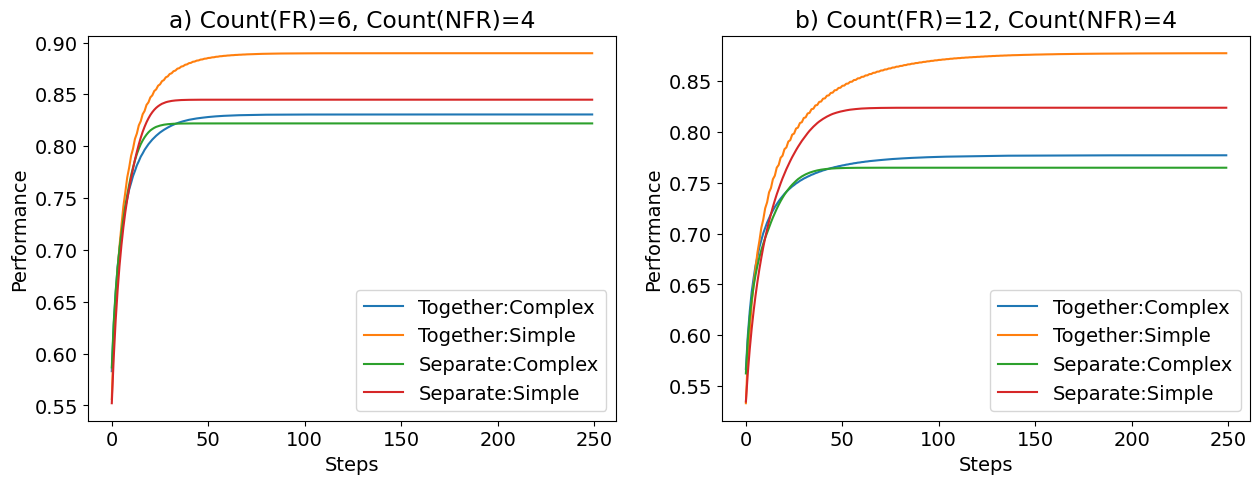

In [10]:
x = range(search_iteration)
plt.subplots(figsize=(15, 5))
font = {'size': 14}
matplotlib.rc('font', **font)


plt.subplot(1, 2, 1)
for name, vals in fr__N6_together.items():
    plt.plot(x, fr__N6_together[name], label=f"Together:{name}")
for name, vals in fr__N6_separate.items():
    plt.plot(x, fr__N6_separate[name], label=f"Separate:{name}")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("Steps")
plt.title("a) Count(FR)=6, Count(NFR)=4")

plt.subplot(1, 2, 2)
for name, vals in fr__N12_together.items():
    plt.plot(x, fr__N12_together[name], label=f"Together:{name}")
for name, vals in fr__N12_separate.items():
    plt.plot(x, fr__N12_separate[name], label=f"Separate:{name}")
plt.legend()
plt.ylabel("Performance")
plt.xlabel("Steps")
plt.title("b) Count(FR)=12, Count(NFR)=4")

plt.show()

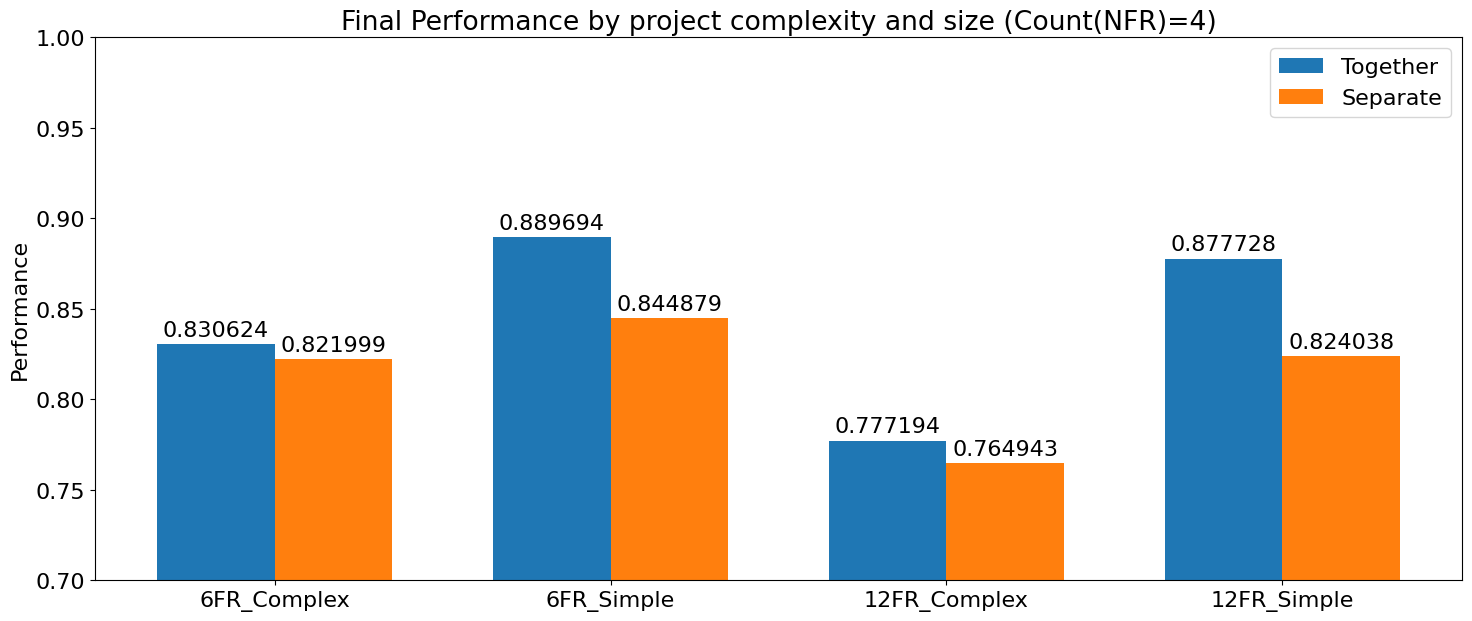

In [11]:
font = {'size': 16}
matplotlib.rc('font', **font)

labels = ["6FR_Complex", "6FR_Simple", "12FR_Complex", "12FR_Simple"]
max_perfomance_together = []
max_performance_seperate = []
for name, vals in fr__N6_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in fr__N6_separate.items():
    max_performance_seperate.append(vals[-1])
for name, vals in fr__N12_together.items():
    max_perfomance_together.append(vals[-1])
for name, vals in fr__N12_separate.items():
    max_performance_seperate.append(vals[-1])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6.5))
rects1 = ax.bar(x - width/2, max_perfomance_together, width, label='Together')
rects2 = ax.bar(x + width/2, max_performance_seperate, width, label='Separate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('Final Performance by project complexity and size (Count(NFR)=4)')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.set_ylim([0.7, 1])

fig.tight_layout()

plt.show()